# Plan 

1. Combine both data frames - top 100 and Spotify.  
- add column that show from which DF comes the songs
- import both DF from other file


2. Remove duplicates

3. Make new DF only with numerical variables

4. standardization the new df




In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pickle




# Importing DF

In [5]:
hot_100_df = pd.read_csv('D:\Data Science\Ironhack\Week 3\Project_song_recomender\data\hot_100.csv')
spotify_df = pd.read_csv('D:\Data Science\Ironhack\Week 3\Project_song_recomender\data\spotify_df.csv')

hot_100 = hot_100_df.copy()
spotify = spotify_df.copy()


# Removing unnamed column

In [6]:
# removing unnamed: 0 column and reseting indexes

hot_100.drop(['Unnamed: 0'], axis=1, inplace=True)
spotify.drop(['Unnamed: 0'], axis=1, inplace=True)


# Adding new column with index 1 for hot_100 and index 0 for spotify

In [8]:
# index 1 for hot 100

origin_hot_100 = [1 for i in range(100)]

# index 0 for spotify
origin_spotify = [0 for i in range(10000)]


hot_100['origin'] = origin_hot_100
spotify['origin'] = origin_spotify

In [9]:
hot_100

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,origin
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,...,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,1
1,Good 4 U,Olivia Rodrigo,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,...,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4,1
2,Levitating,Dua Lipa Featuring DaBaby,0.708,0.796,6,-4.821,0,0.0610,0.00886,0.000000,...,0.923,103.026,audio_features,49gruEYzuJZoy4R2q5xVlT,spotify:track:49gruEYzuJZoy4R2q5xVlT,https://api.spotify.com/v1/tracks/49gruEYzuJZo...,https://api.spotify.com/v1/audio-analysis/49gr...,203064,4,1
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,...,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,1
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,...,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Things A Man Oughta Know,Lainey Wilson,0.659,0.683,3,-5.623,1,0.0312,0.51300,0.000005,...,0.397,139.931,audio_features,5QS8PNEWbqTEZyQ6e9ZbJf,spotify:track:5QS8PNEWbqTEZyQ6e9ZbJf,https://api.spotify.com/v1/tracks/5QS8PNEWbqTE...,https://api.spotify.com/v1/audio-analysis/5QS8...,203373,4,1
96,Country Again,Thomas Rhett,0.467,0.481,2,-6.947,1,0.0255,0.22700,0.000189,...,0.248,147.886,audio_features,3SR6R5XetNfOcVqvUwDkTz,spotify:track:3SR6R5XetNfOcVqvUwDkTz,https://api.spotify.com/v1/tracks/3SR6R5XetNfO...,https://api.spotify.com/v1/audio-analysis/3SR6...,221240,4,1
97,Drunk (And I Don't Wanna Go Home),Elle King & Miranda Lambert,0.612,0.884,5,-4.400,1,0.0459,0.00516,0.000000,...,0.626,119.991,audio_features,0QULNNd9z5s35entfiiXoa,spotify:track:0QULNNd9z5s35entfiiXoa,https://api.spotify.com/v1/tracks/0QULNNd9z5s3...,https://api.spotify.com/v1/audio-analysis/0QUL...,245626,4,1
98,If You Want To,Lil Baby & Lil Durk,0.795,0.599,6,-7.819,1,0.1230,0.04140,0.000000,...,0.351,97.033,audio_features,1EXRmdtTA2IEnYGiuw9plD,spotify:track:1EXRmdtTA2IEnYGiuw9plD,https://api.spotify.com/v1/tracks/1EXRmdtTA2IE...,https://api.spotify.com/v1/audio-analysis/1EXR...,195454,4,1


# Removing duplicates

In [10]:
spotify.drop_duplicates(subset=['uri'], inplace=True, ignore_index=True)
spotify

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,origin
0,Wild Strawberries,PNAU,0.647,0.933,7,-4.056,1,0.1110,0.000351,0.002770,...,0.332,119.921,audio_features,6pGUGTIaZ1H4jKHIL4Fged,spotify:track:6pGUGTIaZ1H4jKHIL4Fged,https://api.spotify.com/v1/tracks/6pGUGTIaZ1H4...,https://api.spotify.com/v1/audio-analysis/6pGU...,235107,4,0
1,Papaoutai,Stromae,0.733,0.818,10,-7.222,0,0.0859,0.024100,0.000000,...,0.253,116.019,audio_features,09TcIuH1ZO7i4vicWKoaN2,spotify:track:09TcIuH1ZO7i4vicWKoaN2,https://api.spotify.com/v1/tracks/09TcIuH1ZO7i...,https://api.spotify.com/v1/audio-analysis/09Tc...,232147,4,0
2,Sweet Dreams (Are Made of This) - Remastered,Eurythmics,0.692,0.711,0,-7.498,0,0.0317,0.225000,0.000000,...,0.875,125.135,audio_features,1TfqLAPs4K3s2rJMoCokcS,spotify:track:1TfqLAPs4K3s2rJMoCokcS,https://api.spotify.com/v1/tracks/1TfqLAPs4K3s...,https://api.spotify.com/v1/audio-analysis/1Tfq...,216933,4,0
3,Rock and Roll - 1990 Remaster,Led Zeppelin,0.327,0.895,9,-7.428,1,0.0367,0.000564,0.015900,...,0.898,169.390,audio_features,3w2GGz0HjIu9OcWXINRFJR,spotify:track:3w2GGz0HjIu9OcWXINRFJR,https://api.spotify.com/v1/tracks/3w2GGz0HjIu9...,https://api.spotify.com/v1/audio-analysis/3w2G...,219800,4,0
4,Talk Dirty (feat. 2 Chainz),Jason Derulo,0.760,0.652,6,-7.321,1,0.2320,0.034800,0.000000,...,0.759,100.315,audio_features,4X4tgBEUiT6WqB2oTJ5ynH,spotify:track:4X4tgBEUiT6WqB2oTJ5ynH,https://api.spotify.com/v1/tracks/4X4tgBEUiT6W...,https://api.spotify.com/v1/audio-analysis/4X4t...,177685,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9938,Yayo,Lana Del Rey,0.506,0.201,3,-12.931,0,0.0294,0.926000,0.000411,...,0.145,71.925,audio_features,6EfNun62AXVq3on5hqKEWu,spotify:track:6EfNun62AXVq3on5hqKEWu,https://api.spotify.com/v1/tracks/6EfNun62AXVq...,https://api.spotify.com/v1/audio-analysis/6EfN...,321054,4,0
9939,Yayo,Lana Del Rey,0.506,0.201,3,-12.931,0,0.0294,0.926000,0.000411,...,0.145,71.925,audio_features,2rldjI2fK6nYwlMgaITluf,spotify:track:2rldjI2fK6nYwlMgaITluf,https://api.spotify.com/v1/tracks/2rldjI2fK6nY...,https://api.spotify.com/v1/audio-analysis/2rld...,321054,4,0
9940,Regret In Your Tears,Nicki Minaj,0.770,0.477,0,-10.972,0,0.0802,0.749000,0.208000,...,0.248,106.128,audio_features,0j8zLbIueSkVqB3Tl6PsjA,spotify:track:0j8zLbIueSkVqB3Tl6PsjA,https://api.spotify.com/v1/tracks/0j8zLbIueSkV...,https://api.spotify.com/v1/audio-analysis/0j8z...,229573,4,0
9941,OBLIVION - Anderex Remix,Riot Shift,0.329,0.977,8,-4.688,1,0.4230,0.001200,0.008310,...,0.286,161.017,audio_features,6T4jfMT7vzbpjm8durkojq,spotify:track:6T4jfMT7vzbpjm8durkojq,https://api.spotify.com/v1/tracks/6T4jfMT7vzbp...,https://api.spotify.com/v1/audio-analysis/6T4j...,212633,4,0


# Concatenate

In [11]:
concat_top_100_and_spotify = pd.concat([hot_100, spotify], axis = 0, ignore_index = True)
concat_top_100_and_spotify

,Title,Artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,origin
0,Butter,BTS,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,...,0.695,109.997,audio_features,2bgTY4UwhfBYhGT4HUYStN,spotify:track:2bgTY4UwhfBYhGT4HUYStN,https://api.spotify.com/v1/tracks/2bgTY4UwhfBY...,https://api.spotify.com/v1/audio-analysis/2bgT...,164442,4,1
1,Good 4 U,Olivia Rodrigo,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,...,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4,1
2,Levitating,Dua Lipa Featuring DaBaby,0.708,0.796,6,-4.821,0,0.0610,0.00886,0.000000,...,0.923,103.026,audio_features,49gruEYzuJZoy4R2q5xVlT,spotify:track:49gruEYzuJZoy4R2q5xVlT,https://api.spotify.com/v1/tracks/49gruEYzuJZo...,https://api.spotify.com/v1/audio-analysis/49gr...,203064,4,1
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,...,0.464,90.030,audio_features,4iJyoBOLtHqaGxP12qzhQI,spotify:track:4iJyoBOLtHqaGxP12qzhQI,https://api.spotify.com/v1/tracks/4iJyoBOLtHqa...,https://api.spotify.com/v1/audio-analysis/4iJy...,198082,4,1
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,...,0.719,148.088,audio_features,7MAibcTli4IisCtbHKrGMh,spotify:track:7MAibcTli4IisCtbHKrGMh,https://api.spotify.com/v1/tracks/7MAibcTli4Ii...,https://api.spotify.com/v1/audio-analysis/7MAi...,242096,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,Yayo,Lana Del Rey,0.506,0.201,3,-12.931,0,0.0294,0.92600,0.000411,...,0.145,71.925,audio_features,6EfNun62AXVq3on5hqKEWu,spotify:track:6EfNun62AXVq3on5hqKEWu,https://api.spotify.com/v1/tracks/6EfNun62AXVq...,https://api.spotify.com/v1/audio-analysis/6EfN...,321054,4,0
10039,Yayo,Lana Del Rey,0.506,0.201,3,-12.931,0,0.0294,0.92600,0.000411,...,0.145,71.925,audio_features,2rldjI2fK6nYwlMgaITluf,spotify:track:2rldjI2fK6nYwlMgaITluf,https://api.spotify.com/v1/tracks/2rldjI2fK6nY...,https://api.spotify.com/v1/audio-analysis/2rld...,321054,4,0
10040,Regret In Your Tears,Nicki Minaj,0.770,0.477,0,-10.972,0,0.0802,0.74900,0.208000,...,0.248,106.128,audio_features,0j8zLbIueSkVqB3Tl6PsjA,spotify:track:0j8zLbIueSkVqB3Tl6PsjA,https://api.spotify.com/v1/tracks/0j8zLbIueSkV...,https://api.spotify.com/v1/audio-analysis/0j8z...,229573,4,0
10041,OBLIVION - Anderex Remix,Riot Shift,0.329,0.977,8,-4.688,1,0.4230,0.00120,0.008310,...,0.286,161.017,audio_features,6T4jfMT7vzbpjm8durkojq,spotify:track:6T4jfMT7vzbpjm8durkojq,https://api.spotify.com/v1/tracks/6T4jfMT7vzbp...,https://api.spotify.com/v1/audio-analysis/6T4j...,212633,4,0


# Taking numerical variables

In [12]:
numerical = concat_top_100_and_spotify.copy()

In [51]:
numerical.drop(['Title', 'Artist', 'type', 'id', 'uri', 'track_href', 'analysis_url',
               'time_signature', 'origin'], axis=1, inplace=True)
numerical

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.759,0.459,8,-5.187,1,0.0948,0.00323,0.000000,0.0906,0.695,109.997,164442
1,0.563,0.664,9,-5.044,1,0.1540,0.33500,0.000000,0.0849,0.688,166.928,178147
2,0.708,0.796,6,-4.821,0,0.0610,0.00886,0.000000,0.0668,0.923,103.026,203064
3,0.677,0.696,0,-6.181,1,0.1190,0.32100,0.000000,0.4200,0.464,90.030,198082
4,0.586,0.616,5,-7.964,1,0.0324,0.18200,0.000000,0.0927,0.719,148.088,242096
...,...,...,...,...,...,...,...,...,...,...,...,...
10038,0.506,0.201,3,-12.931,0,0.0294,0.92600,0.000411,0.2530,0.145,71.925,321054
10039,0.506,0.201,3,-12.931,0,0.0294,0.92600,0.000411,0.2530,0.145,71.925,321054
10040,0.770,0.477,0,-10.972,0,0.0802,0.74900,0.208000,0.1660,0.248,106.128,229573
10041,0.329,0.977,8,-4.688,1,0.4230,0.00120,0.008310,0.2980,0.286,161.017,212633


# Convert pandas DF to NP array

In [14]:
numerical_np_array = numerical.to_numpy()
numerical_np_array

array([[7.59000e-01, 4.59000e-01, 8.00000e+00, ..., 6.95000e-01,
        1.09997e+02, 1.64442e+05],
       [5.63000e-01, 6.64000e-01, 9.00000e+00, ..., 6.88000e-01,
        1.66928e+02, 1.78147e+05],
       [7.08000e-01, 7.96000e-01, 6.00000e+00, ..., 9.23000e-01,
        1.03026e+02, 2.03064e+05],
       ...,
       [7.70000e-01, 4.77000e-01, 0.00000e+00, ..., 2.48000e-01,
        1.06128e+02, 2.29573e+05],
       [3.29000e-01, 9.77000e-01, 8.00000e+00, ..., 2.86000e-01,
        1.61017e+02, 2.12633e+05],
       [5.40000e-01, 3.41000e-01, 1.00000e+01, ..., 2.83000e-01,
        1.37753e+02, 1.40339e+05]])

# standardize 

In [52]:
scaler = StandardScaler().fit(numerical_np_array)
numerical_array_scaled = scaler.transform(numerical_np_array)

numerical_scalled_df = pd.DataFrame(numerical_array_scaled, columns = numerical.columns)
numerical_scalled_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.996282,-1.231372,0.749224,0.453165,0.780511,0.115918,-0.685853,-0.408605,-0.649467,0.762846,-0.488981,-1.277501
1,-0.238658,-0.221006,1.026348,0.495894,0.780511,0.812795,0.639010,-0.408605,-0.685018,0.733866,1.613560,-1.000138
2,0.674946,0.429571,0.194977,0.562526,-1.281212,-0.281961,-0.663371,-0.408605,-0.797910,1.706778,-0.746429,-0.495866
3,0.479624,-0.063290,-1.467764,0.156160,0.780511,0.400790,0.583103,-0.408605,1.405033,-0.193506,-1.226390,-0.596692
4,-0.093742,-0.457580,-0.082146,-0.376597,0.780511,-0.618628,0.028032,-0.408605,-0.636369,0.862208,0.917772,0.294066
...,...,...,...,...,...,...,...,...,...,...,...,...
10038,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025
10039,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025
10040,1.065590,-1.142657,-1.467764,-1.275381,-1.281212,-0.055947,2.292242,0.491767,-0.179190,-1.087757,-0.631868,0.040625
10041,-1.713026,1.321651,0.749224,0.602266,0.780511,3.979346,-0.693959,-0.372634,0.644107,-0.930435,1.395258,-0.302208


In [16]:
numerical_scalled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04,1.004300e+04
mean,-1.013141e-15,-2.490402e-16,1.139076e-16,1.132001e-17,-1.337176e-16,-1.528201e-16,-1.188601e-16,-3.396002e-17,1.344251e-16,9.905007e-17,-2.023451e-16,-8.490006e-17
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.339241e+00,-3.479363e+00,-1.467764e+00,-9.878673e+00,-1.281212e+00,-7.422291e-01,-6.987457e-01,-4.086052e-01,-1.139702e+00,-2.006020e+00,-2.934097e+00,-3.322600e+00
25%,-6.671069e-01,-6.103666e-01,-9.135171e-01,-4.054308e-01,-1.281212e+00,-5.680099e-01,-6.743122e-01,-4.086052e-01,-6.338739e-01,-7.689728e-01,-7.471127e-01,-6.597845e-01
50%,4.487418e-02,1.880692e-01,-8.214645e-02,2.302621e-01,7.805109e-01,-3.855506e-01,-4.958909e-01,-4.083057e-01,-4.161992e-01,-1.962343e-02,-3.185417e-03,-1.145808e-01
75%,7.190509e-01,7.992175e-01,7.492242e-01,6.648638e-01,7.805109e-01,8.413488e-02,2.496612e-01,-3.525484e-01,3.915048e-01,7.918267e-01,5.632312e-01,5.603490e-01
max,2.388741e+00,1.430080e+00,1.580595e+00,2.198445e+00,7.805109e-01,1.006525e+01,3.274598e+00,3.885480e+00,4.922756e+00,1.984162e+00,3.482398e+00,7.394070e+00


# Clustering with K-Means

In [57]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(numerical_scalled_df)

KMeans(n_clusters=7, random_state=1234)

In [58]:
with open('D:\Data Science\Ironhack\Week 3\Project_song_recomender\model\Kmean.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

# Making clusters

In [21]:
clusters = kmeans.predict(numerical_scalled_df)
pd.Series(clusters).value_counts().sort_index()


0    1254
1    1750
2    2222
3     592
4     802
5    2712
6     711
dtype: int64

# Plaing with the parameters

In [25]:
kmeans = KMeans(n_clusters=7,
                init="random",
                n_init=3,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=2,
                tol=0,
                algorithm="full",
                random_state=1234)
kmeans.fit(numerical_scalled_df)
print(kmeans.inertia_)

80261.4402100813


# Choosing K

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

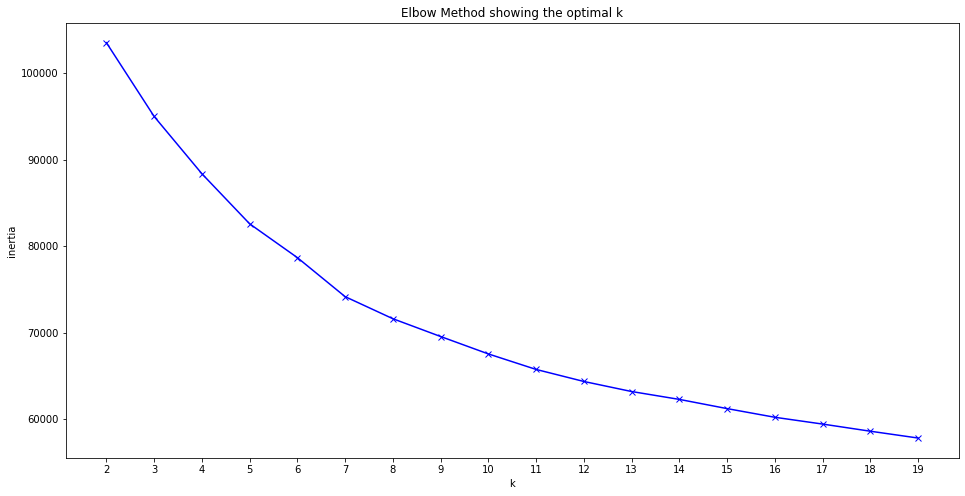

In [26]:
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(numerical_scalled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

# Silouhete method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

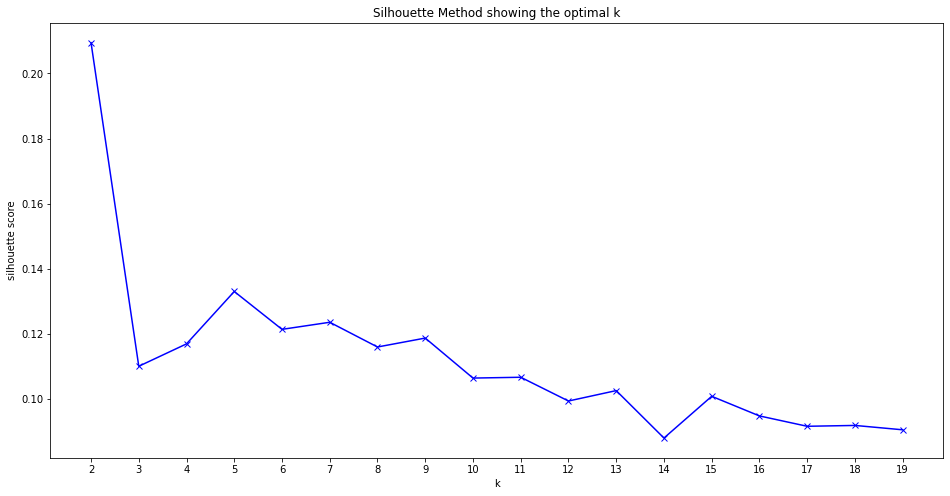

In [27]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(numerical_scalled_df)
    silhouette.append(silhouette_score(numerical_scalled_df, kmeans.predict(numerical_scalled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

# Testing inertia scores

In [61]:
kmeans = KMeans(n_clusters=7, random_state=1234)
kmeans.fit(numerical_scalled_df)

final_cluster = kmeans.predict(numerical_scalled_df)
pd.Series(final_cluster).value_counts().sort_index()



0    1254
1    1750
2    2222
3     592
4     802
5    2712
6     711
dtype: int64

# Saving model

In [54]:
with open('D:\Data Science\Ironhack\Week 3\Project_song_recomender\model\scaler.pickle', 'wb') as f:
    pickle.dump(scaler, f)

In [62]:
with open('D:\Data Science\Ironhack\Week 3\Project_song_recomender\model\Kmean.pickle', 'wb') as f:
    pickle.dump(kmeans, f)

# Updating internal DB

In [37]:
clustered_df = pd.DataFrame(numerical_scalled_df)
clustered_df["cluster"] = final_cluster
clustered_df['origin'] = concat_top_100_and_spotify['origin']
clustered_df['title'] = concat_top_100_and_spotify['Title']
clustered_df['artist'] = concat_top_100_and_spotify['Artist']
clustered_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster,origin,title,artist
0,0.996282,-1.231372,0.749224,0.453165,0.780511,0.115918,-0.685853,-0.408605,-0.649467,0.762846,-0.488981,-1.277501,5,1,Butter,BTS
1,-0.238658,-0.221006,1.026348,0.495894,0.780511,0.812795,0.639010,-0.408605,-0.685018,0.733866,1.613560,-1.000138,1,1,Good 4 U,Olivia Rodrigo
2,0.674946,0.429571,0.194977,0.562526,-1.281212,-0.281961,-0.663371,-0.408605,-0.797910,1.706778,-0.746429,-0.495866,2,1,Levitating,Dua Lipa Featuring DaBaby
3,0.479624,-0.063290,-1.467764,0.156160,0.780511,0.400790,0.583103,-0.408605,1.405033,-0.193506,-1.226390,-0.596692,5,1,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
4,-0.093742,-0.457580,-0.082146,-0.376597,0.780511,-0.618628,0.028032,-0.408605,-0.636369,0.862208,0.917772,0.294066,5,1,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025,0,0,Yayo,Lana Del Rey
10039,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025,0,0,Yayo,Lana Del Rey
10040,1.065590,-1.142657,-1.467764,-1.275381,-1.281212,-0.055947,2.292242,0.491767,-0.179190,-1.087757,-0.631868,0.040625,0,0,Regret In Your Tears,Nicki Minaj
10041,-1.713026,1.321651,0.749224,0.602266,0.780511,3.979346,-0.693959,-0.372634,0.644107,-0.930435,1.395258,-0.302208,6,0,OBLIVION - Anderex Remix,Riot Shift


# Reordering clustered df

In [38]:
clustered_df = clustered_df[["title", "artist", "cluster", 'origin', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']]
clustered_df



,title,artist,cluster,origin,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Butter,BTS,5,1,0.996282,-1.231372,0.749224,0.453165,0.780511,0.115918,-0.685853,-0.408605,-0.649467,0.762846,-0.488981,-1.277501
1,Good 4 U,Olivia Rodrigo,1,1,-0.238658,-0.221006,1.026348,0.495894,0.780511,0.812795,0.639010,-0.408605,-0.685018,0.733866,1.613560,-1.000138
2,Levitating,Dua Lipa Featuring DaBaby,2,1,0.674946,0.429571,0.194977,0.562526,-1.281212,-0.281961,-0.663371,-0.408605,-0.797910,1.706778,-0.746429,-0.495866
3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon,5,1,0.479624,-0.063290,-1.467764,0.156160,0.780511,0.400790,0.583103,-0.408605,1.405033,-0.193506,-1.226390,-0.596692
4,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak),5,1,-0.093742,-0.457580,-0.082146,-0.376597,0.780511,-0.618628,0.028032,-0.408605,-0.636369,0.862208,0.917772,0.294066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,Yayo,Lana Del Rey,0,0,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025
10039,Yayo,Lana Del Rey,0,0,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025
10040,Regret In Your Tears,Nicki Minaj,0,0,1.065590,-1.142657,-1.467764,-1.275381,-1.281212,-0.055947,2.292242,0.491767,-0.179190,-1.087757,-0.631868,0.040625
10041,OBLIVION - Anderex Remix,Riot Shift,6,0,-1.713026,1.321651,0.749224,0.602266,0.780511,3.979346,-0.693959,-0.372634,0.644107,-0.930435,1.395258,-0.302208


# Updating smaller names

In [45]:
clustered_df['title'] = clustered_df['title'].str.lower()
clustered_df['artist'] = clustered_df['artist'].str.lower()
clustered_df

,title,artist,cluster,origin,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,butter,bts,5,1,0.996282,-1.231372,0.749224,0.453165,0.780511,0.115918,-0.685853,-0.408605,-0.649467,0.762846,-0.488981,-1.277501
1,good 4 u,olivia rodrigo,1,1,-0.238658,-0.221006,1.026348,0.495894,0.780511,0.812795,0.639010,-0.408605,-0.685018,0.733866,1.613560,-1.000138
2,levitating,dua lipa featuring dababy,2,1,0.674946,0.429571,0.194977,0.562526,-1.281212,-0.281961,-0.663371,-0.408605,-0.797910,1.706778,-0.746429,-0.495866
3,peaches,justin bieber featuring daniel caesar & giveon,5,1,0.479624,-0.063290,-1.467764,0.156160,0.780511,0.400790,0.583103,-0.408605,1.405033,-0.193506,-1.226390,-0.596692
4,leave the door open,silk sonic (bruno mars & anderson .paak),5,1,-0.093742,-0.457580,-0.082146,-0.376597,0.780511,-0.618628,0.028032,-0.408605,-0.636369,0.862208,0.917772,0.294066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10038,yayo,lana del rey,0,0,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025
10039,yayo,lana del rey,0,0,-0.597799,-2.502955,-0.636394,-1.860727,-1.281212,-0.653942,2.999059,-0.406826,0.363438,-1.514182,-1.895032,1.892025
10040,regret in your tears,nicki minaj,0,0,1.065590,-1.142657,-1.467764,-1.275381,-1.281212,-0.055947,2.292242,0.491767,-0.179190,-1.087757,-0.631868,0.040625
10041,oblivion - anderex remix,riot shift,6,0,-1.713026,1.321651,0.749224,0.602266,0.780511,3.979346,-0.693959,-0.372634,0.644107,-0.930435,1.395258,-0.302208


# Exporting model's df to csv

In [46]:
# defining file name, type and directory to be exported

file_name = 'clustered_df.csv'
saving_path = r'D:\Data Science\Ironhack\Week 3\Project_song_recomender\data\{}'.format(file_name)



clustered_df.to_csv(saving_path)